# Statistical Simulation

## Random drawing: `np.random.choice()`
- Like multinomial distribution
### Throwing a fair dice 1000 times

In [1]:
import numpy as np
die, probabilites, throws = list(range(1,7)), [1/6]*6, 1000
print(list(zip(die, probabilites)))

[(1, 0.16666666666666666), (2, 0.16666666666666666), (3, 0.16666666666666666), (4, 0.16666666666666666), (5, 0.16666666666666666), (6, 0.16666666666666666)]


In [2]:
outcome = np.random.choice(die, size = throws, p = probabilites)
print("First 10 trials: {}".format(outcome[:10]))

First 10 trials: [1 6 3 5 1 4 5 1 5 1]


### Drawing lottery
- Bernoulli experiment

In [3]:
# Pre-defined constant variables
lottery_ticket_cost, num_tickets, grand_prize = 50, 10000, 1000000

# Probability of winning
chance_of_winning = 1/num_tickets

# Simulate a single drawing of the lottery
gains = [-lottery_ticket_cost, grand_prize - lottery_ticket_cost]
probability = [1 - chance_of_winning,  chance_of_winning]
outcome = np.random.choice(a=gains, size=1, p=probability, replace=True)

print("Outcome of one drawing of the lottery is {}".format(outcome))

Outcome of one drawing of the lottery is [-50]


In [4]:
# Simulate 10000 drawing of the lottery
size = 10000
outcomes = np.random.choice(a=gains, size=size, p=probability, replace=True)

# Mean of outcomes.
answer = np.mean(outcomes)
print("Average payoff from {} simulations = {}".format(size, answer))

Average payoff from 10000 simulations = 150.0


In [5]:
# Initialize simulations and cost of ticket
sims, lottery_ticket_cost = 5000, 0

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
while 1:
    gains = [-lottery_ticket_cost, grand_prize - lottery_ticket_cost]
    outcomes = np.random.choice(a=gains, size=sims, p=probability, replace=True)
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 50
answer = lottery_ticket_cost - 50

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))

The highest price at which it makes sense to buy the ticket is 0


## Probability calculation
### Poker
- `np.random.shuffle()`

In [6]:
deck_of_cards = list(zip(['Heart']*13+['Club']*13+['Spade']*13+['Diamond']*13, list(range(1,14))*4))

#### Probability of two of a kind

In [7]:
# Shuffle deck & count card occurrences in the hand
n_sims, two_kind = 10000, 0
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for card in hand:
        # Use .get() method on cards_in_hand
        cards_in_hand[card[1]] = cards_in_hand.get(card[1],0) + 1
    
    # Condition for getting at least 2 of a kind
    highest_card = max(cards_in_hand.values())
    if highest_card>=2: 
       two_kind += 1

print("Probability of seeing at least two of a kind within 5 cards = {} ".format(two_kind/n_sims))

Probability of seeing at least two of a kind within 5 cards = 0.486 


#### Probaility of Game of thirteen

In [8]:
# Pre-set constant variables
deck, sims, coincidences = np.arange(1, 14), 10000, 0

for _ in range(sims):
    # Draw all the cards without replacement to simulate one game
    draw = np.random.choice(deck, size=13, replace=False)
    # Check if there are any coincidences
    if (draw == list(np.arange(1, 14))).any():  # coincidence = (draw == list(np.arange(1, 14))).any()
        coincidences += 1

# Calculate probability of winning
print("Probability of winning = {}".format(1 - coincidences/sims))

Probability of winning = 0.3678


#### Probability of full house

In [9]:
#Shuffle deck & count card occurrences in the hand
deck = list(zip(['Heart']*13+['Club']*13+['Spade']*13+['Diamond']*13, list(range(1,14))*4))

n_sims, full_house, deck_of_cards = 50000, 0, deck.copy() 
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for card in hand:
        # Use .get() method to count occurrences of each card
        cards_in_hand[card[1]] = cards_in_hand.get(card[1], 0) + 1
    # Condition for getting full house
    if  (max(cards_in_hand.values())==3) & (min(cards_in_hand.values())==2): #condition = (max(cards_in_hand.values())==3) & (min(cards_in_hand.values())==2)
        full_house += 1

f'Probability of seeing a full house = {full_house/n_sims}'

'Probability of seeing a full house = 0.00156'

## Data Generating Process
1. Define Possible Outcomes for Random Variables.
2. Assign Probabilities.
3. Define Relationships between Random Variables.

### Example: driving test

In [10]:
sims, outcomes, p_rain, p_pass = 1000, [], 0.40, {'sun':0.9, 'rain':0.3}

def test_outcome(p_rain):  
    # Simulate whether it will rain or not
    weather = np.random.choice(['rain', 'sun'], size=1, p=[p_rain, 1-p_rain])
    # Simulate and return whether you will pass or fail
    return 'pass' if weather[0] == 'sun' else 'fail'

for _ in range(sims):
    outcomes.append(test_outcome(p_rain))

# Calculate fraction of outcomes where you pass
print("Probability of Passing the driving test = {}".format(outcomes.count('pass')/sims))

Probability of Passing the driving test = 0.603


### Example: eCommerce
- Steps
  1. Ad impression
  2. Click
  3. Sign-up
  4. Purchase
  
#### Sign-up flow model    
- Sign-up flow model
  1. Ad impression ~ poisson(lambda) with lambda ~ Normal r.v.
  2. Click ~ Bin(n = impressions, p = clickthrough rate)
  3. Sign-up ~ Bin(n = clicks, p = sign-up rate)
- function: `np.random.uniform()`, `np.random.normal()`, `np.random.poisson()`, `np.random.binomial()`
  

In [11]:
# Initialize click-through rate and signup rate dictionaries
ct_rate = {'low':0.01, 'high':np.random.uniform(low=0.01, high=1.2*0.01)}
su_rate = {'low':0.2, 'high':np.random.uniform(low=0.2, high=1.2*0.2)}

def get_signups(cost, ct_rate, su_rate, sims):
    lam = np.random.normal(loc=100000, scale=2000, size=sims)
    # Simulate impressions(poisson), clicks(binomial) and signups(binomial)
    impressions = np.random.poisson(lam)
    clicks = np.random.binomial(n=impressions, p=ct_rate[cost])
    signups = np.random.binomial(n=clicks, p=su_rate[cost])
    return signups

print("Simulated Signups = {}".format(get_signups('high', ct_rate, su_rate, 1)))

Simulated Signups = [270]


#### Purchase flow model    
- flow
    1. Sign-up ~ Bin(n = clicks, p = sign-up rate)
    2. Purchase ~ Bin(n = Sign-up, p = purchase rate)
    3. Purchase value ~ Exp(avgerage purchase value)

- function: `np.random.exponential()`, `np.random.poisson()`, `np.random.binomial()`
  

In [12]:
def get_revenue(signups):
    rev = []
    np.random.seed(123)
    for s in signups:
        # Model purchases as binomial, purchase_values as exponential
        purchases = np.random.binomial(s, p=0.1)
        purchase_values = np.random.exponential(size=purchases,scale=1000)
        
        # Append to revenue the sum of all purchase values.
        rev.append(purchase_values.sum())
    return rev

print("Simulated Revenue = ${:4.3f}".format(get_revenue(get_signups('low', ct_rate, su_rate, 1))[0]))

Simulated Revenue = $19788.228


#### Probability of losing money b/w high and low costs

In [13]:
# Initialize cost_diff
sims, cost_diff = 10000, 3000

# Get revenue when the cost is 'low' and when the cost is 'high'
rev_low = get_revenue(get_signups('low', ct_rate, su_rate, sims))
rev_high = get_revenue(get_signups('high', ct_rate, su_rate, sims))

# calculate fraction of times rev_high - rev_low is less than cost_diff
print("Probability of losing money = {}".format(((np.asarray(rev_high) - np.asarray(rev_low)) < cost_diff).mean()))

Probability of losing money = 0.3767


## Resampling
### Bootstrapping
- Sampling with replacement
- Pratical thinking
    - Run at least 5-10k iterations
    - Expect an approximate answer
    - Consider bias correction

In [14]:
wrench_lengths = np.random.uniform(0, 100, 100)
# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, replace=True, size=len(wrench_lengths))
    sample_mean = np.mean(temp_sample)
    mean_lengths.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(np.mean(mean_lengths), np.percentile(mean_lengths, [2.5, 97.5])))

Bootstrapped Mean Length = 42.96121255453939, 95% CI = [ 37.95149689  48.27315347]


##### Example: Regression
- function: `np.random.multivariate_normal()`

,x,y
0,3.881370,13.332820
1,1.376910,17.365830
2,2.395083,8.833141
3,-0.746162,6.710722
4,4.037550,15.983923


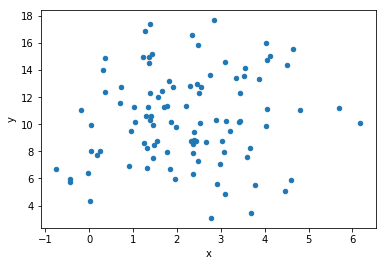

In [15]:
% matplotlib inline
import pandas as pd
df = pd.DataFrame(np.random.multivariate_normal([2,10], [[1, 0.5], [0.5, 10]], 100) + np.random.normal(0,1,[100,2]), columns=['x', 'y'])
display(df.head())

df.plot.scatter('x','y')

In [16]:
import statsmodels.formula.api as smf
rsquared_boot, coefs_boot, sims = [], [], 1000
reg_fit = smf.OLS(df['y'], df.iloc[:,0]).fit()

# Run 1K iterations
for i in range(sims):
    # First create a bootstrap sample with replacement with n=df.shape[0]
    bootstrap = df.sample(n=df.shape[0], replace=True)
    # Fit the regression and append the r square to rsquared_boot
    rsquared_boot.append(smf.OLS(bootstrap['y'],bootstrap.iloc[:,0]).fit().rsquared)

# Calculate 95% CI on rsquared_boot
print("R Squared 95% CI = {}".format(np.percentile(rsquared_boot, [2.5, 97.5])))

R Squared 95% CI = [ 0.60884914  0.74800437]


### Jackknife
- leave one out
- Jackknife estimator
$$\hat{\theta}_{\mbox{jack}} = \frac{1}{M}\sum_{m=1}^M \hat{\theta}_m$$
- Variance
$$Var(\hat{\theta}_{\mbox{jack}}) = \frac{M-1}{M}\sum_{m=1}^M (\hat{\theta}_m - \hat{\theta}_{\mbox{jack}})^2$$

In [17]:
# Leave one observation out from wrench_lengths to get the jackknife sample and store the mean length
mean_lengths, n = [], len(wrench_lengths)
index = np.arange(n)

for i in range(n):
    jk_sample = wrench_lengths[index!=i]
    mean_lengths.append(np.mean(jk_sample))

# The jackknife estimate is the mean of the mean lengths from each sample
mean_lengths = np.array(mean_lengths)
print("Jackknife estimate of the mean = {}".format(mean_lengths.mean()))

Jackknife estimate of the mean = 42.937128021277


In [18]:
# Leave one observation out to get the jackknife sample and store the median length
median_lengths = []
for i in range(n):
    jk_sample = wrench_lengths[index != i]
    median_lengths.append(np.median(jk_sample))

median_lengths = np.array(median_lengths)

# Calculate jackknife estimate and it's variance
jk_median_length = np.mean(median_lengths)
jk_var = (n-1)*np.var(median_lengths)

# Assuming normality, calculate lower and upper 95% confidence intervals
print("Jackknife 95% CI lower = {}, upper = {}".format(jk_median_length - 1.96*np.sqrt(jk_var), jk_median_length + 1.96*np.sqrt(jk_var)))

Jackknife 95% CI lower = 18.873813380236612, upper = 62.91188654178991


## Permutation test
- pros
   1. Very flexible
   2. No strict assumptions
   3. Widely applicable
- cons
   1. Computationally Expensive
   2. Custom coding required

In [19]:
donations_A = np.random.normal(10, 2, 100)
donations_B = np.random.normal(10.5, 1, 100)

# Concatenate the two arrays donations_A and donations_B into data
len_A, len_B = len(donations_A), len(donations_B)
data = np.concatenate([donations_A, donations_B])

# Get a single permutation of the concatenated length
perm = np.random.permutation(len(donations_A) + len(donations_B))

# Calculate the permutated datasets and difference in means
permuted_A = data[perm[:len(donations_A)]]
permuted_B = data[perm[len(donations_A):]]
print("Difference in the permuted mean values = {}.".format(permuted_A.mean() - permuted_B.mean()))

Difference in the permuted mean values = 0.38620251060556754.


In [20]:
sims = 10000
# Generate permutations equal to the number of repetitions
perm = np.array([np.random.permutation(len(donations_A) + len(donations_B)) for i in range(sims)])
permuted_A_datasets = data[perm[:, :len(donations_A)]]
permuted_B_datasets = data[perm[:, len(donations_A):]]

# Calculate the difference in means for each of the datasets
samples = np.mean(permuted_A_datasets,axis=1)- np.mean(permuted_B_datasets,axis=1)
# Calculate the test statistic and p-value
test_stat = np.mean(donations_A) - np.mean(donations_B)
print("p-value = {}".format(2*np.sum(samples >= np.abs(test_stat))/sims))

p-value = 0.3282


In [21]:
# Calculate the difference in 80th percentile and median for each of the permuted datasets (A and B)
samples_percentile = np.percentile(permuted_A_datasets, axis=1,q=80)-np.percentile(permuted_B_datasets, axis=1, q=80)
samples_median = np.percentile(permuted_A_datasets, axis=1,q=50)-np.percentile(permuted_B_datasets, axis=1, q=50)

# Calculate the test statistic from the original dataset and corresponding p-values
test_stat_percentile = np.percentile(donations_A, q=80) - np.percentile(donations_B, q=80)
test_stat_median = np.median(donations_A) - np.median(donations_B)

print("80th Percentile: test statistic = {}, p-value = {}".format(test_stat_percentile, 2*np.sum(samples_percentile >= np.abs(test_stat_percentile))/sims))
print("Median: test statistic = {}, p-value = {}".format(test_stat_median, 2*np.sum(samples_median >= np.abs(test_stat_median))/sims))

80th Percentile: test statistic = 0.42998708488181947, p-value = 0.0364
Median: test statistic = -0.20436728891112743, p-value = 0.3054


## Application
### Monte-Carlo Integration
- Step for a single function $f(x)$
    1. Get the limits of the x-axis (xmin,xmax) and y-axis $(\max(f(x)),\min(\min(f(x)),0))$.
    2. Generate a number of uniformly distributed point in this box.
    3. Multiply the area of the box $(((\max(f(x)−\min(f(x))×(xmax−xmin))$ by the fraction of points that lie below f(x).

In [22]:
# Define the sim_integrate function
def sim_integrate(func, xmin, xmax, sims):
    x = np.random.uniform(xmin, xmax, sims)
    y = np.random.uniform(min(min(func(x)),0), max(func(x)), sims)
    area = (max(y) - min(y))*(xmax-xmin)
    result = area * sum(abs(y) < abs(func(x)))/sims
    return result
    
# Call the sim_integrate function and print results
result = sim_integrate(func = lambda x: x*np.exp(x), xmin = 0, xmax = 1, sims = 50)
print("Simulated answer = {}, Actual Answer = 1".format(result))

Simulated answer = 1.3223881036366358, Actual Answer = 1


### Statistical power
- power = P(rejecting Null∣true alternative)
- Probability of detecting an effect if it exists.
- Depends on sample size, α and effect size.
- Typically 80% power recommended for $\alpha = 0.05$

In [23]:
import scipy.stats as st
# Initialize effect_size, control_mean, control_sd
effect_size, sample_size, control_mean, control_sd = 0.05, 50, 1, 0.5

# Simulate control_time_spent and treatment_time_spent, assuming equal variance
control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=sample_size)
treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=sample_size)

# Run the t-test and get the p_value
t_stat, p_value = st.ttest_ind(control_time_spent, treatment_time_spent)
print("P-value: {}, Statistically Significant? {}".format(p_value, p_value < 0.05))

P-value: 0.8419305083623946, Statistically Significant? False


In [24]:
sample_size = 50
sims = 1000
# Keep incrementing sample size by 10 till we reach required power
while 1:
    control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=[sample_size,sims])
    treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=[sample_size,sims])
    t, p = st.ttest_ind(treatment_time_spent, control_time_spent)
    
    # Power is the fraction of times in the simulation when the p-value was less than 0.05
    power = (p < 0.05).sum()/sims
    if power >= 0.8: 
        break
    else: 
        sample_size += 10
print("For 80% power, sample size required = {}".format(sample_size))

For 80% power, sample size required = 1530


### Portfolio return

In [25]:
# rates is a Normal random variable and has size equal to number of years
def portfolio_return(yrs, avg_return, volatility, principal):
    rates = np.random.normal(loc=avg_return, scale= volatility, size=yrs)
    # Calculate the return at the end of the period
    end_return = principal
    for x in rates:
        end_return += end_return*x
    return end_return

result = portfolio_return(yrs = 5, avg_return = 0.07, volatility = 0.15, principal = 1000)
print("Portfolio return after 5 years = {}".format(result))

Portfolio return after 5 years = 1717.1692779684754


In [26]:
# Run 1,000 iterations and store the results
rets = []
for i in range(sims):
    rets.append(portfolio_return(yrs = 10,
                                 avg_return = 0.07, 
                                 volatility = 0.15, 
                                 principal = 1000))

# Calculate the 95% CI
print("95% CI of Returns: Lower = {}, Upper = {}".format(np.percentile(rets, 2.5), np.percentile(rets, 97.5)))

95% CI of Returns: Lower = 751.3573612023818, Upper = 4361.998694376244


In [27]:
rets_stock, rets_bond = [],[]
for i in range(sims):
    rets_stock.append(portfolio_return(yrs = 10, avg_return = 0.07, volatility = 0.3, principal = 10000))
    rets_bond.append(portfolio_return(yrs = 10, avg_return = 0.04, volatility = 0.1, principal = 10000))

# Calculate the 25th percentile of the distributions and the amount you'd lose or gain
rets_stock_perc = np.percentile(rets_stock, 25)
rets_bond_perc = np.percentile(rets_bond, 25)
print("Sticking to stocks gets you an additional return of {}".format(rets_stock_perc - rets_bond_perc))

Sticking to stocks gets you an additional return of -4807.147119990249
